In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [0]:
from sklearn.neural_network import MLPClassifier
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE  
from sklearn.metrics import classification_report, confusion_matrix  
from keras.layers.core import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from keras import regularizers
from sklearn import metrics
import seaborn as sns
from keras import optimizers
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [0]:
from tensorflow.python.client import device_lib


In [14]:
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14327243075166937544
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 7498691980714230939
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 4621021758815028186
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 15956161332
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6174699584092254344
physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
]


In [15]:
path = "/content/drive/My Drive/Sleep data"
filename_read = os.path.join(path, "All_data_patients_correct.csv")
patient_all = pd.read_csv(filename_read)
PAL = patient_all
print("All patients\n", PAL.head())
PAL = shuffle(PAL)
print("All patients shuffled\n",PAL.head())
print("Patients data size", PAL.shape)

min_max_scaler = preprocessing.MinMaxScaler()
PAL[['heartbeat']] = min_max_scaler.fit_transform(PAL[['heartbeat']].values)

print("\nPatients data normalized heartbeat\n", PAL.head())

result = []
for x in PAL.columns:
    if x != 'label':
        result.append(x)

X = PAL[result].values
X_with_time = X
X = np.delete(X,0,1)
y = PAL['label'].values
print("X data \n", X[0:5])

print("Y data \n", y[0:5])

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
X_train_time, X_test_time, y_train_time, y_test_time = train_test_split(X_with_time, y, test_size = 0.2, random_state = 42)
#smt = SMOTE()
#X_train, y_train = smt.fit_sample(X_train, y_train)

one_hot = np.identity(7)
train_labels_one_hot = []
train_labels_one_hot_time = []
test_labels_one_hot = []
test_labels_one_hot_time = []
for i in range(y_train.shape[0]):
    train_labels_one_hot.append(one_hot[y_train[i]])   
    train_labels_one_hot_time.append(one_hot[y_train_time[i]])

for i in range(y_test.shape[0]):
    test_labels_one_hot.append(one_hot[y_test[i]]) 
    test_labels_one_hot_time.append(one_hot[y_test_time[i]])
print(X_train.shape[1])

#X_train_reshaped = X_train.reshape(32*32*3, 73257)
#X_test_reshaped = X_test.reshape(32*32*3, 26032)
input_shape = X_train.shape[1]
input_shape_time = X_train_time.shape[1]
print('input_shape', input_shape)
print("x train shape", X_train.shape)

x_val = X_test
y_val = np.array(test_labels_one_hot)
x_val_time = X_test_time
y_val_time = np.array(test_labels_one_hot_time)
print(x_val.shape)


All patients
     time         x         y         z  heartbeat  label
0    0.0  0.184021  0.679169 -0.476990       87.0     -1
1   30.0 -0.301010  0.805710  0.487167       95.0     -1
2   60.0 -0.323517  0.923447  0.146362       84.0     -1
3   90.0 -0.509674  0.855102 -0.049118       85.0     -1
4  120.0 -0.387756  0.919067  0.023758       82.0     -1
All patients shuffled
           time         x         y         z  heartbeat  label
11138  12960.0 -0.489136 -0.721283 -0.482956       64.0      2
14992  12030.0 -0.111282 -0.923660  0.346405       63.0      0
20565   7470.0 -0.159134  0.872864 -0.453384       61.0      2
23314   4680.0 -0.586410  0.362381 -0.729324       72.0      3
2226    6990.0 -0.502884 -0.533966  0.672272       65.0      2
Patients data size (25781, 6)

Patients data normalized heartbeat
           time         x         y         z  heartbeat  label
11138  12960.0 -0.489136 -0.721283 -0.482956   0.258427      2
14992  12030.0 -0.111282 -0.923660  0.346405   0.2

In [29]:
print("\nInitializing Keras\n")
model = Sequential()
model.add(Dense(100, input_shape = (input_shape,),  activation = 'relu', kernel_regularizer= regularizers.l2(0.001)))
model.add(Dropout(0.04))
model.add(Dense(75, activation = 'relu',kernel_regularizer= regularizers.l2(0.001)))
model.add(Dropout(0.04))
model.add(Dense(25, activation= 'relu', kernel_regularizer= regularizers.l2(0.001)))
model.add(Dropout(0.04))
model.add(Dense(7,activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc']) # adaptive momentum solves issue of local minimum
#model.summary()

monitor = EarlyStopping(monitor='loss', min_delta= 1e-3, patience = 5, verbose = 1, mode = 'auto' )

#model.fit(X_train, np.array(train_labels_one_hot),callbacks = [monitor], verbose = 2, epochs = 25)
history = model.fit(X_train, np.array(train_labels_one_hot), batch_size= 32, validation_data= (x_val, y_val),verbose = 2, epochs = 300)
#history = model.fit_generator(X_train, steps_per_epoch = 100, epochs = 10, validation_data = np.array(train_labels_one_hot), verbose = 2, validation_steps = 50)
pred = model.predict(X_train)
score = np.sqrt(metrics.mean_squared_error(pred,train_labels_one_hot))
print(f"Final score (RMSE): {score}")

print(pred.shape)
print(y_train.shape)
corrects,wrongs = 0,0
for i in range(len(pred)):
    res = pred[i]
    res_max = res.argmax()
    if res_max == y_train[i]:
        corrects += 1
    else:
        wrongs += 1
        
print("Accuracy train: ", corrects / (corrects + wrongs))

pred = model.predict(X_test)
score = np.sqrt(metrics.mean_squared_error(pred,test_labels_one_hot))
print(f"Final Test score (RMSE): {score}")

corrects,wrongs = 0,0
for i in range(len(pred)):
    res = pred[i]
    res_max = res.argmax()
    if res_max == y_test[i]:
        corrects += 1
    else:
        wrongs += 1
        
print("Accuracy test: ", corrects / (corrects + wrongs))



Initializing Keras

Train on 20624 samples, validate on 5157 samples
Epoch 1/300
 - 5s - loss: 1.5232 - acc: 0.4809 - val_loss: 1.4638 - val_acc: 0.4842
Epoch 2/300
 - 4s - loss: 1.4613 - acc: 0.4819 - val_loss: 1.4484 - val_acc: 0.4842
Epoch 3/300
 - 4s - loss: 1.4479 - acc: 0.4817 - val_loss: 1.4374 - val_acc: 0.4836
Epoch 4/300
 - 4s - loss: 1.4413 - acc: 0.4819 - val_loss: 1.4322 - val_acc: 0.4838
Epoch 5/300
 - 4s - loss: 1.4368 - acc: 0.4824 - val_loss: 1.4354 - val_acc: 0.4842
Epoch 6/300
 - 4s - loss: 1.4317 - acc: 0.4820 - val_loss: 1.4275 - val_acc: 0.4830
Epoch 7/300
 - 4s - loss: 1.4273 - acc: 0.4831 - val_loss: 1.4229 - val_acc: 0.4828
Epoch 8/300
 - 4s - loss: 1.4256 - acc: 0.4820 - val_loss: 1.4169 - val_acc: 0.4821
Epoch 9/300
 - 4s - loss: 1.4228 - acc: 0.4832 - val_loss: 1.4211 - val_acc: 0.4830
Epoch 10/300
 - 4s - loss: 1.4214 - acc: 0.4836 - val_loss: 1.4174 - val_acc: 0.4836
Epoch 11/300
 - 4s - loss: 1.4207 - acc: 0.4837 - val_loss: 1.4171 - val_acc: 0.4815
Epoc

In [30]:
print("\nInitializing Keras\n")
model = Sequential()
model.add(Dense(100, input_shape = (input_shape_time,),  activation = 'relu', kernel_regularizer= regularizers.l2(0.001)))
model.add(Dropout(0.04))
model.add(Dense(75, activation = 'relu',kernel_regularizer= regularizers.l2(0.001)))
model.add(Dropout(0.04))
model.add(Dense(25, activation= 'relu', kernel_regularizer= regularizers.l2(0.001)))
model.add(Dropout(0.04))
model.add(Dense(7,activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

monitor = EarlyStopping(monitor='loss', min_delta= 1e-3, patience = 5, verbose = 1, mode = 'auto' )

#model.fit(X_train, np.array(train_labels_one_hot),callbacks = [monitor], verbose = 2, epochs = 25)
history_time = model.fit(X_train_time, np.array(train_labels_one_hot_time), batch_size= 32, validation_data= (x_val_time, y_val_time),verbose = 2, epochs = 300)
#history = model.fit_generator(X_train, steps_per_epoch = 100, epochs = 10, validation_data = np.array(train_labels_one_hot), verbose = 2, validation_steps = 50)
pred = model.predict(X_train_time)
score = np.sqrt(metrics.mean_squared_error(pred,train_labels_one_hot_time))
print(f"Final score (RMSE): {score}")

print(pred.shape)
print(y_train_time.shape)
corrects,wrongs = 0,0
for i in range(len(pred)):
    res = pred[i]
    res_max = res.argmax()
    if res_max == y_train_time[i]:
        corrects += 1
    else:
        wrongs += 1
        
print("Accuracy train: ", corrects / (corrects + wrongs))

pred = model.predict(X_test_time)
score = np.sqrt(metrics.mean_squared_error(pred,test_labels_one_hot_time))
print(f"Final Test score (RMSE): {score}")

corrects,wrongs = 0,0
for i in range(len(pred)):
    res = pred[i]
    res_max = res.argmax()
    if res_max == y_test_time[i]:
        corrects += 1
    else:
        wrongs += 1
        
print("Accuracy test: ", corrects / (corrects + wrongs))


Initializing Keras

Train on 20624 samples, validate on 5157 samples
Epoch 1/300
 - 5s - loss: 8.4335 - acc: 0.4779 - val_loss: 8.3348 - val_acc: 0.4848
Epoch 2/300
 - 4s - loss: 8.3880 - acc: 0.4810 - val_loss: 8.3399 - val_acc: 0.4848
Epoch 3/300
 - 4s - loss: 8.3664 - acc: 0.4827 - val_loss: 8.3380 - val_acc: 0.4848
Epoch 4/300
 - 4s - loss: 8.3656 - acc: 0.4828 - val_loss: 8.3362 - val_acc: 0.4848
Epoch 5/300
 - 4s - loss: 8.3632 - acc: 0.4827 - val_loss: 8.3283 - val_acc: 0.4848
Epoch 6/300
 - 4s - loss: 11.3858 - acc: 0.2948 - val_loss: 14.7566 - val_acc: 0.0861
Epoch 7/300
 - 4s - loss: 14.8080 - acc: 0.0826 - val_loss: 14.7546 - val_acc: 0.0861
Epoch 8/300
 - 4s - loss: 14.8061 - acc: 0.0827 - val_loss: 14.7526 - val_acc: 0.0861
Epoch 9/300
 - 4s - loss: 14.8040 - acc: 0.0827 - val_loss: 14.7505 - val_acc: 0.0865
Epoch 10/300
 - 4s - loss: 14.8019 - acc: 0.0830 - val_loss: 14.7483 - val_acc: 0.0865
Epoch 11/300
 - 4s - loss: 14.7996 - acc: 0.0830 - val_loss: 14.7459 - val_acc:

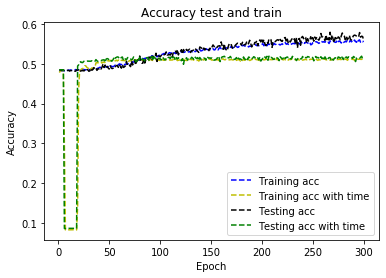

In [31]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc) + 1)

acc_time = history_time.history['acc']
val_acc_time = history_time.history['val_acc']
loss_time = history_time.history['loss']
val_loss_time = history_time.history['val_loss']

plt.plot(epochs, acc, 'b--', label = 'Training acc')
plt.plot(epochs,acc_time, 'y--', label = 'Training acc with time' )
plt.plot(epochs, val_acc, 'k--', label = 'Testing acc')
plt.plot(epochs, val_acc_time, 'g--', label = 'Testing acc with time')
plt.title('Accuracy test and train')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()